In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD PHENO

In [172]:
pheno_p = '/Users/harveyaa/Documents/masters/data/pheno_26-01-22.csv'
pheno = pd.read_csv(pheno_p,index_col=0)

datasets_p ='/Users/harveyaa/Documents/masters/neuropsych_mtl/datasets/{}.txt'

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/2794670915.py:2: DtypeWarning: Columns (7,8,12,13,14,19,20,24,27,31,42,43,44,49,51,59,60,62,64,65,68,101,121,163) have mixed types. Specify dtype option on import or set low_memory=False.
  pheno = pd.read_csv(pheno_p,index_col=0)


# ES PLOT

In [173]:
table = pd.read_csv('./results/mtd_table.csv',index_col=0)
table['err'] = table['ci_95'] - table['ci_5']
cases = ['DUP15q13_3_CHRNA7', 'DEL2q13', 'DUP15q11_2', 'DUP2q13', 'DUP16p13_11', 'TAR_dup', 'DUP13q12_12','DEL13q12_12', 
        'DEL15q11_2','DUP16p11_2', 'DUP22q11_2', 'DEL1q21_1',
       'DUP1q21_1', 'DEL16p11_2', 'DEL22q11_2',
       'ADHD',
       'ASD',
       'SZ',
       'BIP']
case_labels = ['DUP 15q13.3', 'DEL 2q13', 'DUP 15q11.2', 'DUP 2q13', 'DUP 16p13.11', 'DUP TAR', 'DUP 13q12.12','DEL 13q12.12', 
        'DEL 15q11.2','DUP 16p11.2', 'DUP 22q11.2', 'DEL 1q21.1',
       'DUP 1q21.1', 'DEL 16p11.2', 'DEL 22q11.2',
       'ADHD',
       'ASD',
       'SZ',
       'BIP']
table.loc[cases]

,mtd_std,mtd,p_permut,fdr,ci_5,ci_95,err
DUP15q13_3_CHRNA7,0.106261,0.024656,0.855829,0.0,0.144104,0.182692,0.038588
DEL2q13,0.107843,0.024989,0.874225,0.0,0.145266,0.186049,0.040782
DUP15q11_2,0.159217,0.038388,0.035993,0.0,0.189115,0.245761,0.056646
DUP2q13,0.178627,0.041533,0.311538,0.0,0.211111,0.279342,0.068231
DUP16p13_11,0.255509,0.059901,0.374725,0.0,0.306844,0.425955,0.119111
TAR_dup,0.279564,0.064035,0.797840,0.0,0.345256,0.469213,0.123958
DUP13q12_12,0.311164,0.070466,0.969006,0.0,0.381096,0.598574,0.217477
DEL13q12_12,0.339890,0.079366,0.495901,0.0,0.394815,0.620942,0.226127
DEL15q11_2,0.199066,0.046352,0.015997,1.0,0.227023,0.295435,0.068412
DUP16p11_2,0.377355,0.087058,0.004799,7.0,0.442415,0.576966,0.134551


In [174]:
siggy = table.loc[cases]
siggy = siggy[siggy['p_permut']<0.05].index.to_list()
siggy

['DUP15q11_2',
 'DEL15q11_2',
 'DUP16p11_2',
 'DUP22q11_2',
 'DEL1q21_1',
 'DUP1q21_1',
 'DEL16p11_2',
 'DEL22q11_2',
 'ADHD',
 'ASD',
 'SZ',
 'BIP']

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/515851302.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(case_labels,rotation=270)


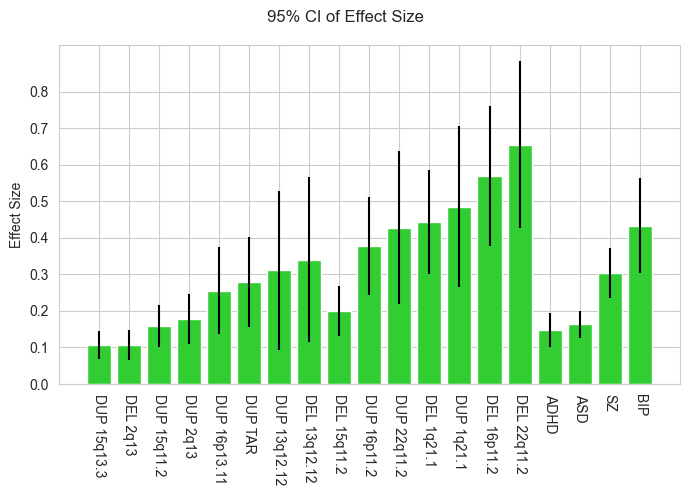

In [175]:
#sns.barplot(data = table.loc[order],y='mtd_std',errwidth='err')
fig, ax = plt.subplots(figsize=(7,5))
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
sns.set_style('whitegrid')
plt.bar(x = table.loc[cases].index, height=table.loc[cases]['mtd_std'],yerr=table.loc[cases]['err'],color='limegreen')
ax.set_xticklabels(case_labels,rotation=270)
plt.ylabel('Effect Size')
plt.suptitle('95% CI of Effect Size')
plt.tight_layout()
#plt.savefig('./results/effect_size_ci.png',dpi=300)


In [176]:
cnv1 = ['DUP15q13_3_CHRNA7', 'DEL2q13', 'DUP15q11_2', 'DUP2q13', 'DUP16p13_11', 'TAR_dup', 'DUP13q12_12','DEL13q12_12']
cnv2 = ['DEL15q11_2','DUP16p11_2', 'DUP22q11_2', 'DEL1q21_1',
       'DUP1q21_1', 'DEL16p11_2', 'DEL22q11_2']
psych = ['ADHD', 'ASD', 'SZ', 'BIP']

siggy1 = [x for x in cnv1 if x in siggy]
siggy2 = [x for x in cnv2 if x in siggy]
siggy3 = [x for x in psych if x in siggy]

l_cnv1 = ['DUP 15q13.3   n=191',
'DEL 2q13         n=183',
'DUP 15q11.2   n=136',
'DUP 2q13         n=88',
'DUP 16p13.11  n=39',
'DUP TAR           n=29',
'DUP 13q12.12   n=20',
'DEL 13q12.12   n=22']

l_cnv2 = ['DEL 15q11.2    n=103', 
'DUP 22q11.2     n=22', 
'DUP 16p11.2     n=35', 
'DEL 1q21.1       n=25', 
'DUP 1q21.1       n=19',
'DEL 16p11.2      n=32',
'DEL 22q11.2     n=43']

l_psych = ['ADHD              n=223',
'ASD                 n=472',
'SZ                   n=283',
'BIP                  n=44'
]

cases_labels =       ['BIP                  n=44',
                    'SZ                   n=283',
                    'ASD                 n=472',
                    'ADHD              n=223',

                    'DEL 22q11.2     n=43',
                    'DEL 16p11.2      n=32',
                    'DUP 1q21.1       n=19',
                    'DEL 1q21.1       n=25',
                    'DUP 16p11.2     n=35',
                    'DUP 22q11.2     n=22',
                    'DEL 15q11.2    n=103',
                     
                    'DEL 13q12.12   n=22',
                    'DUP 13q12.12   n=20',
                    'DUP TAR           n=29',
                    'DUP 16p13.11  n=39',
                    'DUP 2q13         n=88',
                    'DUP 15q11.2   n=136',
                    'DEL 2q13         n=183',
                    'DUP 15q13.3   n=191']


siggy1

['DUP15q11_2']

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/1265835137.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(l_cnv1,rotation=270,fontsize=9)
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/1265835137.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(l_cnv2,rotation=270,fontsize=9)
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/1265835137.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(l_psych,rotation=270,fontsize=9)


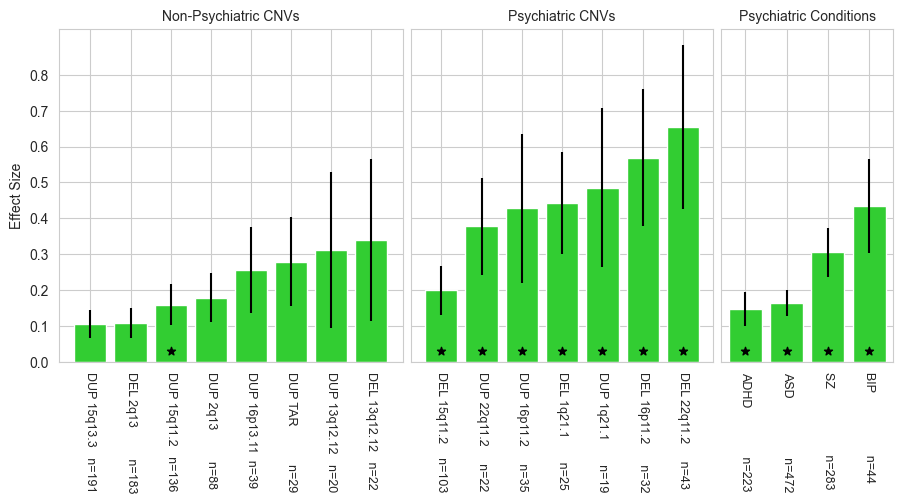

In [177]:
# V2

fig, ax = plt.subplots(1,3,figsize=(9,5),sharey=True, gridspec_kw={'width_ratios': [len(cnv1),len(cnv2), len(psych)]})
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
sns.set_style('whitegrid')

ax[0].bar(x = table.loc[cnv1].index, height=table.loc[cnv1]['mtd_std'],yerr=table.loc[cnv1]['err'],color='limegreen')
ax[0].scatter(table.loc[siggy1].index,[0.03],marker='*',color='black')
ax[0].set_xticklabels(l_cnv1,rotation=270,fontsize=9)
ax[0].set_title('Non-Psychiatric CNVs',fontsize=10)

ax[1].bar(x = table.loc[cnv2].index, height=table.loc[cnv2]['mtd_std'],yerr=table.loc[cnv2]['err'],color='limegreen')
ax[1].scatter(table.loc[siggy2].index,0.03*np.ones(len(siggy2)),marker='*',color='black')
ax[1].set_xticklabels(l_cnv2,rotation=270,fontsize=9)
ax[1].set_title('Psychiatric CNVs',fontsize=10)

ax[2].bar(x = table.loc[psych].index, height=table.loc[psych]['mtd_std'],yerr=table.loc[psych]['err'],color='limegreen')
ax[2].scatter(table.loc[siggy3].index,0.03*np.ones(len(siggy3)),marker='*',color='black')
ax[2].set_xticklabels(l_psych,rotation=270,fontsize=9)
ax[2].set_title('Psychiatric Conditions',fontsize=10)

ax[0].set_ylabel('Effect Size')
#plt.suptitle('95% CI of Effect Size')
plt.tight_layout(pad=0.6)
plt.savefig('./results/effect_size_ci.png',dpi=300)

# DATASET DESCRIPTION TABLE

In [192]:
pheno['CON'] = pheno['non_carriers'] + pheno['CON_IPC']
all_groups = cases + ['CON']
n_tot = pheno[all_groups].sum()
n_sex = pheno.groupby('SEX')[all_groups].sum()

cont_mean = []
cont_std = []
sites = []
n_sites = []
for group in all_groups:
    cont_mean.append(pheno.groupby(group).mean()[['AGE','mean_conn','FD_scrubbed']].loc[1])
    cont_std.append(pheno.groupby(group).std()[['AGE','mean_conn','FD_scrubbed']].loc[1])
    sites.append(pheno[pheno[group]==1]['SITE'].unique())
    n_sites.append(len(pheno[pheno[group]==1]['SITE'].unique()))
cont_mean = pd.concat(cont_mean,axis=1,keys=all_groups).transpose()
cont_std = pd.concat(cont_var,axis=1,keys=all_groups).transpose()
cont_mean.rename({'AGE':'AGE_mean','mean_conn':'mean_conn_mean','FD_scrubbed':'FD_scrubbed_mean'},axis='columns',inplace=True)
cont_std.rename({'AGE':'AGE_std','mean_conn':'mean_conn_std','FD_scrubbed':'FD_scrubbed_std'},axis='columns',inplace=True)

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/2492475108.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cont_mean.append(pheno.groupby(group).mean()[['AGE','mean_conn','FD_scrubbed']].loc[1])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/2492475108.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cont_std.append(pheno.groupby(group).std()[['AGE','mean_conn','FD_scrubbed']].loc[1])
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/2492475108.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future

In [193]:
df = pd.concat([n_tot.transpose(),n_sex.transpose(),cont_mean,cont_std],axis=1)
df['sites'] = n_sites
df.rename({0:'n_tot'},axis='columns',inplace=True)
#df.to_csv('./results/table.csv')
df

,n_tot,Female,Male,AGE_mean,mean_conn_mean,FD_scrubbed_mean,AGE_std,mean_conn_std,FD_scrubbed_std,sites
DUP15q13_3_CHRNA7,191.0,100.0,91.0,64.343745,0.419016,0.193047,7.317196,0.120183,0.051117,4
DEL2q13,183.0,110.0,73.0,63.055085,0.429333,0.187172,7.244691,0.127727,0.049299,3
DUP15q11_2,136.0,76.0,60.0,63.711733,0.406493,0.189497,7.188868,0.132466,0.052242,3
DUP2q13,88.0,43.0,45.0,64.682582,0.415949,0.185450,7.617816,0.128585,0.047601,3
DUP16p13_11,41.0,21.0,20.0,63.987810,0.384560,0.185417,7.701678,0.128856,0.042956,4
TAR_dup,29.0,14.0,15.0,59.847979,0.416091,0.172643,7.543186,0.106558,0.053999,3
DUP13q12_12,20.0,10.0,10.0,60.837366,0.487824,0.200112,7.342615,0.131342,0.059635,3
DEL13q12_12,22.0,12.0,10.0,63.542155,0.423733,0.196252,5.859557,0.144570,0.071538,3
DEL15q11_2,103.0,55.0,48.0,64.291575,0.425977,0.192926,7.438323,0.137856,0.055406,3
DUP16p11_2,35.0,14.0,21.0,34.149868,0.312095,0.212734,19.530374,0.118905,0.090723,6


# BY SITE

In [200]:
pheno['SEX_01'] = pheno['SEX'].map({'Female':1,'Male':0})

In [234]:
all_groups = cases + ['CON']

df_site = pd.concat([pheno.groupby('SITE').mean()[['AGE','mean_conn','FD_scrubbed']],
pheno.groupby('SITE').std()[['AGE','mean_conn','FD_scrubbed']].rename(columns={'AGE':'AGE_std','mean_conn':'mean_conn_std','FD_scrubbed':'FD_scrubbed_std'}),
pheno.groupby('SITE').sum()[['SEX_01']].rename(columns={'SEX_01':'Female'}),
pheno.groupby('SITE').count()[['SEX_01']].rename(columns={'SEX_01':'N'})], axis=1)
#pheno.groupby('SITE').sum()[all_groups]]

#ipc = ['ADHD','ASD','SZ','BIP']
#cnvs = [group for group in all_groups if group not in['ADHD','ASD','SZ','BIP']]
#df_site[cnvs].loc[~(df_site[cnvs]==0).all(axis=1)].transpose()
#df_site[ipc].loc[~(df_site[ipc]==0).all(axis=1)]
df_site


/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/3988367119.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_site = pd.concat([pheno.groupby('SITE').mean()[['AGE','mean_conn','FD_scrubbed']],
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/3988367119.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pheno.groupby('SITE').std()[['AGE','mean_conn','FD_scrubbed']].rename(columns={'AGE':'AGE_std','mean_conn':'mean_conn_std','FD_scrubbed':'FD_scrubbed_std'}),
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/3988367119.py:5: FutureWarning: The default value 

,AGE,mean_conn,FD_scrubbed,AGE_std,mean_conn_std,FD_scrubbed_std,Female,N
SITE,,,,,,,,
ABIDEII-BNI_1,21.437500,0.366952,0.227643,2.448639,0.167921,0.041142,0,16
ABIDEII-ETH_1,22.981771,0.432055,0.169292,4.654830,0.138543,0.036776,0,32
ABIDEII-GU_1,11.029068,0.353350,0.162070,1.550093,0.108752,0.043152,0,57
ABIDEII-IP_1,22.712857,0.365858,0.118320,6.745124,0.110885,0.038715,0,14
ABIDEII-IU_1,23.750000,0.545609,0.122310,6.692213,0.244425,0.032579,0,8
ABIDEII-KKI_1,10.313546,0.364287,0.164837,1.481446,0.112812,0.045922,0,27
ABIDEII-NYU_1,9.497735,0.378148,0.194769,3.852149,0.137862,0.034897,0,68
ABIDEII-OHSU_1,11.245614,0.405510,0.125370,2.123682,0.108218,0.037272,0,57
ABIDEII-OILH_2,22.521739,0.457871,0.120853,3.859693,0.148307,0.026480,0,23


In [ ]:
df_site = pd.concat([cont_mean,cont_std],axis=1)
df['sites'] = n_sites
df.rename({0:'n_tot'},axis='columns',inplace=True)
#df.to_csv('./results/table.csv')
df

In [125]:
for case in ['ASD','ADHD','SZ','BIP']:
    pis = pheno[pheno[case] == 1]['PI'].unique()
    n_con = pheno[(pheno['PI'].isin(pis)) & (pheno['CON_IPC'] == 1)].shape[0]
    n_case = pheno[pheno[case]==1].shape[0]
    print(case)
    print(f'n_case: {n_case}')
    print(f'n_control: {n_con}')
    print(f'%: {n_case/(n_con + n_case)}\n')

    

ASD
n_case: 472
n_control: 471
%: 0.5005302226935313

ADHD
n_case: 223
n_control: 353
%: 0.3871527777777778

SZ
n_case: 283
n_control: 355
%: 0.44357366771159873

BIP
n_case: 44
n_control: 113
%: 0.2802547770700637



# MTD CV TABLE

In [126]:
df = pd.read_csv('./results/mtd_cv_table.csv',index_col=0)
df

,mtd_std,cv_2,cv_5,cv_10
DUP15q13_3_CHRNA7,0.106261,0.056475,0.108711,0.151868
DEL2q13,0.107843,0.060962,0.108220,0.150778
DUP15q11_2,0.159217,0.078190,0.128037,0.171394
DUP2q13,0.178627,0.103021,0.155467,0.216836
DUP16p13_11,0.255509,0.132079,0.208378,0.304292
TAR_dup,0.279564,0.155421,0.310270,0.400604
DUP13q12_12,0.311164,0.198509,0.327515,0.463617
DEL13q12_12,0.339890,0.179324,0.307112,0.416648
DEL15q11_2,0.199066,0.107594,0.152284,0.211196
DUP16p11_2,0.377355,0.272697,0.414156,0.529876


In [127]:
df['cv_10_filt'] = df['cv_10']
df['cv_10_filt'].loc['DEL22q11_2'] = np.nan
df

,mtd_std,cv_2,cv_5,cv_10,cv_10_filt
DUP15q13_3_CHRNA7,0.106261,0.056475,0.108711,0.151868,0.151868
DEL2q13,0.107843,0.060962,0.108220,0.150778,0.150778
DUP15q11_2,0.159217,0.078190,0.128037,0.171394,0.171394
DUP2q13,0.178627,0.103021,0.155467,0.216836,0.216836
DUP16p13_11,0.255509,0.132079,0.208378,0.304292,0.304292
TAR_dup,0.279564,0.155421,0.310270,0.400604,0.400604
DUP13q12_12,0.311164,0.198509,0.327515,0.463617,0.463617
DEL13q12_12,0.339890,0.179324,0.307112,0.416648,0.416648
DEL15q11_2,0.199066,0.107594,0.152284,0.211196,0.211196
DUP16p11_2,0.377355,0.272697,0.414156,0.529876,0.529876


/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/1598617732.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.index, rotation=270)


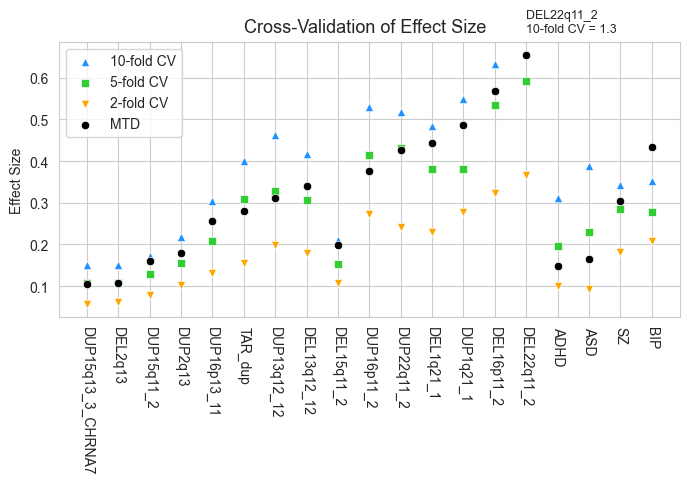

In [128]:
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
colors2 = ['dodgerblue','limegreen','orange','black','forestgreen']
cp = sns.color_palette(colors2)
sns.set_palette(cp)
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(data = df, x = df.index,y = 'cv_10_filt',label='10-fold CV',marker='^')
sns.scatterplot(data = df, x = df.index,y = 'cv_5',label='5-fold CV',marker='s')
sns.scatterplot(data = df, x = df.index,y = 'cv_2',label='2-fold CV',marker='v')
sns.scatterplot(data = df, x = df.index,y = 'mtd_std',label='MTD')
plt.legend(loc='upper left')
ax.set_xticklabels(df.index, rotation=270)
ax.set_ylabel('Effect Size')
plt.text(5,0.71,'Cross-Validation of Effect Size',fontsize=13)
plt.text(14,0.71,'DEL22q11_2\n10-fold CV = 1.3', fontsize=9)
plt.tight_layout()
plt.savefig('./results/effect_size_cv.png',dpi=300)

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/3830213429.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(l_cnv1, rotation=270,fontsize=9)
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/3830213429.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(l_cnv2, rotation=270,fontsize=9)
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_16343/3830213429.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(l_psych, rotation=270,fontsize=9)


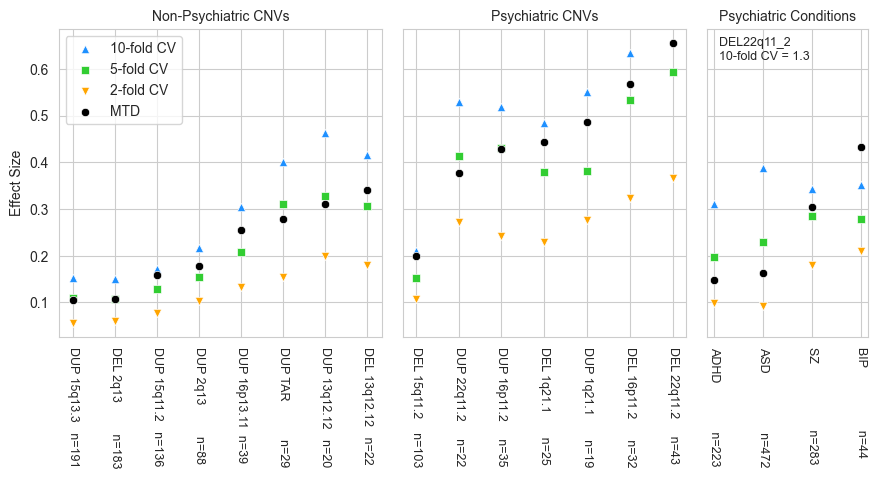

In [170]:
# V2

colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']
colors2 = ['dodgerblue','limegreen','orange','black','forestgreen']
cp = sns.color_palette(colors2)
sns.set_palette(cp)
fig, ax = plt.subplots(1,3,figsize=(9,5),sharey=True, gridspec_kw={'width_ratios': [len(cnv1),len(cnv2), len(psych)]})

sns.scatterplot(data = df.loc[cnv1], x = df.loc[cnv1].index,y = 'cv_10_filt',label='10-fold CV',marker='^',ax=ax[0])
sns.scatterplot(data = df.loc[cnv1], x = df.loc[cnv1].index,y = 'cv_5',label='5-fold CV',marker='s',ax=ax[0])
sns.scatterplot(data = df.loc[cnv1], x = df.loc[cnv1].index,y = 'cv_2',label='2-fold CV',marker='v',ax=ax[0])
sns.scatterplot(data = df.loc[cnv1], x = df.loc[cnv1].index,y = 'mtd_std',label='MTD',ax=ax[0])
ax[0].set_xticklabels(l_cnv1, rotation=270,fontsize=9)
h, l = ax[0].get_legend_handles_labels()

sns.scatterplot(data = df.loc[cnv2], x = df.loc[cnv2].index,y = 'cv_10_filt',label='10-fold CV',marker='^',ax=ax[1])
sns.scatterplot(data = df.loc[cnv2], x = df.loc[cnv2].index,y = 'cv_5',label='5-fold CV',marker='s',ax=ax[1])
sns.scatterplot(data = df.loc[cnv2], x = df.loc[cnv2].index,y = 'cv_2',label='2-fold CV',marker='v',ax=ax[1])
sns.scatterplot(data = df.loc[cnv2], x = df.loc[cnv2].index,y = 'mtd_std',label='MTD',ax=ax[1])
ax[1].set_xticklabels(l_cnv2, rotation=270,fontsize=9)

sns.scatterplot(data = df.loc[psych], x = df.loc[psych].index,y = 'cv_10_filt',label='10-fold CV',marker='^',ax=ax[2])
sns.scatterplot(data = df.loc[psych], x = df.loc[psych].index,y = 'cv_5',label='5-fold CV',marker='s',ax=ax[2])
sns.scatterplot(data = df.loc[psych], x = df.loc[psych].index,y = 'cv_2',label='2-fold CV',marker='v',ax=ax[2])
sns.scatterplot(data = df.loc[psych], x = df.loc[psych].index,y = 'mtd_std',label='MTD',ax=ax[2])
ax[2].set_xticklabels(l_psych, rotation=270,fontsize=9)

ax[0].set_title('Non-Psychiatric CNVs',fontsize=10)
ax[1].set_title('Psychiatric CNVs',fontsize=10)
ax[2].set_title('Psychiatric Conditions',fontsize=10)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].get_legend().remove()
ax[0].legend(h,l,loc='upper left')

ax[0].set_ylabel('Effect Size')
#plt.text(5,0.71,'Cross-Validation of Effect Size',fontsize=13)
plt.text(.1,0.62,'DEL22q11_2\n10-fold CV = 1.3', fontsize=9)
plt.tight_layout(pad=1.5)
plt.savefig('./results/effect_size_cv.png',dpi=300)

# Site controls

In [10]:
df = pheno[(pheno['CON_IPC']==1)|(pheno['non_carriers']==1)].groupby('SITE').sum()[['CON_IPC','non_carriers']]

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_4727/1174803528.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pheno[(pheno['CON_IPC']==1)|(pheno['non_carriers']==1)].groupby('SITE').sum()[['CON_IPC','non_carriers']]


In [11]:
df['count'] = df['CON_IPC'] + df['non_carriers']
df

,CON_IPC,non_carriers,count
SITE,,,
ABIDEII-BNI_1,6.0,0.0,6.0
ABIDEII-ETH_1,23.0,0.0,23.0
ABIDEII-GU_1,26.0,0.0,26.0
ABIDEII-IP_1,7.0,0.0,7.0
ABIDEII-IU_1,3.0,0.0,3.0
ABIDEII-KKI_1,17.0,0.0,17.0
ABIDEII-NYU_1,27.0,0.0,27.0
ABIDEII-OHSU_1,27.0,0.0,27.0
ABIDEII-OILH_2,13.0,0.0,13.0


In [12]:
big_con_sites = df[df['count']>=30].index.to_list()
small_con_sites = df[df['count']<30].index.to_list()

In [13]:
df_big = df[df.index.isin(big_con_sites)]

In [14]:
pheno['SEX_01'] = pheno['SEX'].map({'Female':0,'Male':1})

In [15]:
n_male = pheno[((pheno['CON_IPC']==1)|(pheno['non_carriers']==1)) & pheno['SITE'].isin(big_con_sites)].groupby('SITE').sum()['SEX_01']

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_4727/3978049232.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  n_male = pheno[((pheno['CON_IPC']==1)|(pheno['non_carriers']==1)) & pheno['SITE'].isin(big_con_sites)].groupby('SITE').sum()['SEX_01']


In [16]:
df_big['n_male'] = n_male
df_big['n_female'] = df_big['count'] - df_big['n_male']
df_big['perc_female'] = 100*df_big['n_female']/df_big['count']

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_4727/2347691919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_big['n_male'] = n_male
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_4727/2347691919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_big['n_female'] = df_big['count'] - df_big['n_male']
/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_4727/2347691919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [20]:
df_big[['count','n_female','perc_female']].round(1)

,count,n_female,perc_female
SITE,,,
ADHD1,54.0,35.0,64.8
ADHD3,56.0,26.0,46.4
ADHD5,77.0,39.0,50.6
ADHD6,39.0,18.0,46.2
HSJ,39.0,25.0,64.1
NYU,66.0,0.0,0.0
SZ1,42.0,3.0,7.1
SZ2,41.0,2.0,4.9
SZ3,31.0,15.0,48.4


# What data from where?

In [34]:
ddd = pheno.groupby('PI')[cases].sum().transpose()
for i in ddd.index:
    print(f'{i}: {ddd.loc[i][ddd.loc[i]!= 0].index.to_list()}')

DUP15q13_3_CHRNA7: ['BC', 'UKBB']
DEL2q13: ['UKBB']
DUP15q11_2: ['UKBB']
DUP2q13: ['UKBB']
DUP16p13_11: ['BC', 'UKBB']
TAR_dup: ['UKBB']
DUP13q12_12: ['UKBB']
DEL13q12_12: ['UKBB']
DEL15q11_2: ['UKBB']
DUP16p11_2: ['BC', 'SFARI', 'UKBB']
DUP22q11_2: ['BC', 'Cardiff', 'UCLA', 'UKBB']
DEL1q21_1: ['BC', 'Cardiff', 'SFARI', 'UKBB']
DUP1q21_1: ['BC', 'Cardiff', 'SFARI', 'UKBB']
DEL16p11_2: ['BC', 'Cardiff', 'SFARI', 'UKBB']
DEL22q11_2: ['UCLA']
ADHD: ['ADHD200', 'ds000030']
ASD: ['ABIDE', 'ABIDE2']
SZ: ['Orban', 'ds000030']
BIP: ['ds000030']


In [23]:
pheno.groupby('PI')['SITE'].unique()

PI
ABIDE       [OLIN, SDSU, TRINITY, UM_1, USM, YALE, LEUVEN_...
ABIDE2      [ABIDEII-OILH_2, ABIDEII-GU_1, ABIDEII-SDSU_1,...
ADHD200                   [ADHD5, ADHD6, ADHD4, ADHD3, ADHD1]
BC                                                      [HSJ]
Cardiff                                             [Cardiff]
Orban       [SZ4, SZ5, SZ7, SZ3, SZ9, SZ1, SZ2, SZ10, SZ6,...
SFARI                                          [Svip1, Svip2]
UCLA                                                [UCLA_CB]
UKBB                        [UKBB11026, UKBB11025, UKBB11027]
ds000030                                 [UCLA_DS1, UCLA_DS2]
Name: SITE, dtype: object

In [37]:
dd = pheno.groupby('PI')[cases].sum()
for i in dd.index:
    print(f'{i}: {dd.loc[i][dd.loc[i]!= 0].index.to_list()}')

ABIDE: ['ASD']
ABIDE2: ['ASD']
ADHD200: ['ADHD']
BC: ['DUP15q13_3_CHRNA7', 'DUP16p13_11', 'DUP16p11_2', 'DUP22q11_2', 'DEL1q21_1', 'DUP1q21_1', 'DEL16p11_2']
Cardiff: ['DUP22q11_2', 'DEL1q21_1', 'DUP1q21_1', 'DEL16p11_2']
Orban: ['SZ']
SFARI: ['DUP16p11_2', 'DEL1q21_1', 'DUP1q21_1', 'DEL16p11_2']
UCLA: ['DUP22q11_2', 'DEL22q11_2']
UKBB: ['DUP15q13_3_CHRNA7', 'DEL2q13', 'DUP15q11_2', 'DUP2q13', 'DUP16p13_11', 'TAR_dup', 'DUP13q12_12', 'DEL13q12_12', 'DEL15q11_2', 'DUP16p11_2', 'DUP22q11_2', 'DEL1q21_1', 'DUP1q21_1', 'DEL16p11_2']
ds000030: ['ADHD', 'SZ', 'BIP']


In [237]:
for c in pheno.columns:
    print(c)

conn
SEX
SITE
PI
FD_scrubbed
CNV_name
DX_GROUP
ID
CNV_recurrent
DEL_pli
DUP_pli
Final_region
status
CHR
START
STOP
PIQ
VIQ
relationship
DSM_IV_TR
ADOS_TOTAL
SRS_RAW_TOTAL
BV
COMORBIDITY
CURRENT_MED_STATUS
DX
DX_GROUP_2
Ittentive
Hyper_Impulsive
FSIQ
SUB_ID
PANSS_pos
PANSS_neg
g_SAPS
g_SANS
s_delusions
s_desorganization
s_hallucinations
s_affective
s_social
s_cognition
CNV_full
CNV_DEL_DUP
inheritance
volumetric_scaling_from_t1_head_image_to_standard_space_f25000_2_0
volume_of_grey_matter_f25006_2_0
volume_of_white_matter_f25008_2_0
volume_of_brain_greywhite_matter_f25010_2_0
date_of_attending_assessment_centre_f53_2_0
SA_l
SA_r
SA
CT_l
CT_r
CT
Vol_l
Vol_r
Vol
Array_Information
Array_IID
NB_recurrent_CNV.with_mosaicCNV.
Name_recurrent_CNV.with_mosaicCNV.
NB_recurrent_CNV.without_mosaicCNV.
Name_recurrent_CNV.without_mosaicCNV.
Info_genetic_guillaume
UKBB_IID
frames_scrubbed
Comment_QC_Annabelle
FD
frames_OK
MRI_QC_failed
AGE
fluid_intelligence_score_all
fluid_intelligence_score_f20016_2